# Importing Libraries

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime

import re
from nltk.corpus import stopwords

import json

## Loading Cleaned Data Headings and Sentences Separated

In [2]:
#File Input - Cleaned heading and Sentence data with separate sentences from df_hns_s.csv
df_hns_s = pd.read_csv('df_hns_s.csv',  index_col = [0])
df_hns_s.head()


,headings,Description
0,scope,dubai building code 2021 edition contents part...
1,NaN,content of dbc based on following inputs 1) ex...
2,standards,dbc arranged under themes to integrate all rel...
3,NaN,2 dubai building code part general a.2 definit...
4,built-up area,a.2.1 terms addition increase to buildings gro...


### Basic Exploration and Visualisation

In [3]:
df_hns_s.head(20)

,headings,Description
0,scope,dubai building code 2021 edition contents part...
1,NaN,content of dbc based on following inputs 1) ex...
2,standards,dbc arranged under themes to integrate all rel...
3,NaN,2 dubai building code part general a.2 definit...
4,built-up area,a.2.1 terms addition increase to buildings gro...
5,commissioning,architect physical or legal person in charge o...
6,built-up area,built-up area total constructed area in buildi...
7,occupancy,change of use alteration to use of building to...
8,NaN,civil engineer physical or legal person in cha...
9,NaN,consultant physical or legal person in charge ...


In [4]:
df_hns_s.iloc[0]


headings                                                   scope
Description    dubai building code 2021 edition contents part...
Name: 0, dtype: object

In [5]:
df_hns_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5943 entries, 0 to 5942
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headings     3264 non-null   object
 1   Description  5943 non-null   object
dtypes: object(2)
memory usage: 139.3+ KB


In [6]:
df_hns_s.describe()

,headings,Description
count,3264,5943
unique,596,4660
top,standards,f 43 dubai building code part f structure f.8 ...
freq,148,9


In [7]:
len(df_hns_s[df_hns_s.headings.isnull()])

2679

In [8]:
df_hns_s.fillna('NULL',inplace=True)

In [9]:
df_hns_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5943 entries, 0 to 5942
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headings     5943 non-null   object
 1   Description  5943 non-null   object
dtypes: object(2)
memory usage: 139.3+ KB


In [10]:
df_hns_s.describe()

,headings,Description
count,5943,5943
unique,597,4660
top,NULL,f 43 dubai building code part f structure f.8 ...
freq,2679,9


Text(0.5, 1.0, 'Null Values in given data')

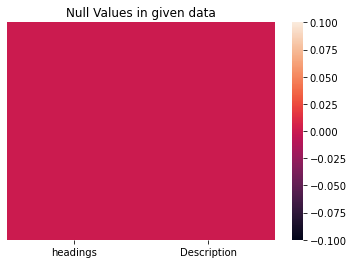

In [11]:
# Heatmap to check null/NaN values
sns.heatmap(df_hns_s.isnull(),cbar=True,yticklabels=False)
plt.title('Null Values in given data')

## Text Processing and Normalization

In [12]:
# !pip install lime

In [13]:
# !pip install transformers

In [14]:
#importing Libraries Required for Text Processing
#NLTK Imports

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk import FreqDist
import spacy
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
stop = stopwords.words('english')
## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
## for explainer
from lime import lime_text
## for word embedding
import gensim
import gensim.downloader as gensim_api
## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K
## for bert language model
import transformers

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yash.hemnani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\yash.hemnani\Anaconda3\envs\Python38\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yash.hemnani\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\yash.hemnani\Anaconda3\envs\Python38\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


## Vector Space and Feature Representation


In [15]:
import torch
from transformers import BertTokenizer, BertModel


import matplotlib.pyplot as plt
%matplotlib inline

# Load pre-trained model tokenizer (vocabulary) distil-bert tokenizer
tokenizer = transformers.AutoTokenizer.from_pretrained('distilbert-base-uncased')

# Training on Various Sentence Transformer Models

In [16]:
# !pip install -U sentence-transformers

In [17]:
from tensorflow.keras.callbacks import CSVLogger
from sentence_transformers import SentenceTransformer

In [18]:
import torch
print(torch.__version__)

1.12.0+cpu


### Loadiing the Distil BERT model

In [19]:
#load the distilbert model 
distilbert = SentenceTransformer('distilbert-base-uncased')
#generate the embeddings for the DBC SENTENCES
embeddings = distilbert.encode(df_hns_s['Description'], convert_to_tensor=True)

No sentence-transformers model found with name C:\Users\yash.hemnani/.cache\torch\sentence_transformers\distilbert-base-uncased. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at C:\Users\yash.hemnani/.cache\torch\sentence_transformers\distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [20]:
#add embeddings to dataframe
df_hns_s['distilbert'] = np.array(embeddings.cpu()).tolist()
#show the top row
df_hns_s.head(1)

,headings,Description,distilbert
0,scope,dubai building code 2021 edition contents part...,"[-0.05723663419485092, 0.32458847761154175, 0...."


### Loading the MS Macro Model

In [22]:
#load the MS MACRO model 
msmacrobert = SentenceTransformer('msmarco-bert-base-dot-v5')
#generate the embeddings for the DBC SENTENCES
mmembeddings = msmacrobert.encode(df_hns_s['Description'], convert_to_tensor=True)

In [23]:
#add embeddings to dataframe
df_hns_s['msmacrobert'] = np.array(mmembeddings.cpu()).tolist()
#show the top row
df_hns_s.head(1)


,headings,Description,distilbert,msmacrobert
0,scope,dubai building code 2021 edition contents part...,"[-0.05723663419485092, 0.32458847761154175, 0....","[-0.004908490926027298, 0.43045637011528015, 0..."


### Load the Multilingual BERT model 

In [24]:

#load the Multilingual BERT model 
mulilingualbert = SentenceTransformer('distiluse-base-multilingual-cased-v2')
#generate the embeddings for the wine reviews
mlembeddings = mulilingualbert.encode(df_hns_s['Description'], convert_to_tensor=True)

In [25]:
#add embeddings to dataframe
df_hns_s['mulilingualbert'] = np.array(mlembeddings.cpu()).tolist()
#show the top row
df_hns_s.head(6)

,headings,Description,distilbert,msmacrobert,mulilingualbert
0,scope,dubai building code 2021 edition contents part...,"[-0.05723663419485092, 0.32458847761154175, 0....","[-0.004908490926027298, 0.43045637011528015, 0...","[0.04508763179183006, -0.022537995129823685, 0..."
1,NULL,content of dbc based on following inputs 1) ex...,"[0.0017879038350656629, 0.38066378235816956, 0...","[0.09734278917312622, 0.3688492476940155, 0.29...","[0.016477515920996666, -0.04879196733236313, -..."
2,standards,dbc arranged under themes to integrate all rel...,"[0.09700190275907516, 0.32356229424476624, 0.1...","[0.047584887593984604, 0.5162714123725891, 0.3...","[0.033759597688913345, -0.027963601052761078, ..."
3,NULL,2 dubai building code part general a.2 definit...,"[0.07687629014253616, 0.16949360072612762, 0.1...","[0.16047324240207672, 0.4372338354587555, 0.12...","[0.03745026886463165, -0.024706697091460228, 0..."
4,built-up area,a.2.1 terms addition increase to buildings gro...,"[0.05973900109529495, 0.07687541842460632, 0.4...","[0.1239137202501297, 0.28907841444015503, 0.11...","[0.01883588172495365, 0.06832122057676315, -0...."
5,commissioning,architect physical or legal person in charge o...,"[0.13330179452896118, 0.40652841329574585, 0.2...","[0.1807652860879898, 0.7577441930770874, 0.171...","[0.0698452815413475, 0.006084001157432795, 0.0..."


In [26]:
df_hns_s.iloc[1]['Description']


'content of dbc based on following inputs 1) existing regulations and technical requirements produced by various authorities and service providers 2) interviews with government authorities, service providers, master developers, consultants and other stakeholders to understand gaps or inconsistencies between existing regulations 3) benchmarking to international and regional codes'

## Creating a Search Index

Discussion: When using a search engine like Google or Bing, users expect to get results pretty quickly. To search through our result set at lightning speed, we can use the lightweight and efficient Non-Metric Space Library (NMSLIB).

In [27]:
# !pip install nmslib

In [21]:
import nmslib

Discussion: we will use cosine similarity as the measure for which we compare the user input to the Item Summary. We need to be able to find the closest vectors to our search vector. Searching and sorting the data using brute force techniques can be expensive and slow. Instead, create an index for the data points.

### Initialize a new index, using a HNSW index on Cosine Similarity and Euclidean Distances (L2)

In [28]:
# initialize a new index, using a HNSW index on Euclidiean Distance Similarity
distilbert_l2index = nmslib.init(method='hnsw', space='l2')
distilbert_l2index.addDataPointBatch(embeddings)
distilbert_l2index.createIndex({'post': 2}, print_progress=True)

In [29]:
# initialize a new index, using a HNSW index on Euclidean Distance
msmacrobert_l2index = nmslib.init(method='hnsw', space='l2')
msmacrobert_l2index.addDataPointBatch(mmembeddings.cpu())
msmacrobert_l2index.createIndex({'post': 2}, print_progress=True)

In [32]:
# initialize a new index, using a HNSW index on Cosine Similarity 
distilbert_index_cs = nmslib.init(method='hnsw', space='cosinesimil')
distilbert_index_cs.addDataPointBatch(embeddings)
distilbert_index_cs.createIndex({'post': 2}, print_progress=True)

In [31]:
# initialize a new index, using a HNSW index on Cosine Similarity
msmacrobert_index_cs = nmslib.init(method='hnsw', space='cosinesimil')
msmacrobert_index_cs.addDataPointBatch(mmembeddings.cpu())
msmacrobert_index_cs.createIndex({'post': 2}, print_progress=True)

In [33]:
# initialize a new index, using a HNSW index on Cosine Similarity
mulilingualbert_index_cs = nmslib.init(method='hnsw', space='cosinesimil')
mulilingualbert_index_cs.addDataPointBatch(mlembeddings.cpu())
mulilingualbert_index_cs.createIndex({'post': 2}, print_progress=True)

In [34]:
# initialize a new index, using a HNSW index on Euclidean Distance
mulilingualbert_l2index = nmslib.init(method='hnsw', space='l2')
mulilingualbert_l2index.addDataPointBatch(mlembeddings.cpu())
mulilingualbert_l2index.createIndex({'post': 2}, print_progress=True)

## Creating a Search Function

In [43]:
def search_data_dl(dataframe, userQuery):
    
    if dataframe is not None and userQuery is not None:
        df = dataframe.copy()
        query = distilbert.encode([userQuery], convert_to_tensor=True)
        ids, distances = distilbert_l2index.knnQuery(query.cpu(), k=10)
    matches = []
    for i, j in zip(ids, distances):
        matches.append({'Description' : df.Description.values[i]
                       })
    return pd.DataFrame(matches)

In [36]:
def search_data_mml(dataframe, userQuery):
    
    if dataframe is not None and userQuery is not None:
        df = dataframe.copy()
        query = msmacrobert.encode([userQuery], convert_to_tensor=True)
        ids, distances = msmacrobert_l2index.knnQuery(query.cpu(), k=10)
    matches = []
    for i, j in zip(ids, distances):
        matches.append({'Description' : df.Description.values[i]
                        , 'Heading' : df.headings.values[i]
                       })
    return pd.DataFrame(matches)

In [37]:
def search_data_dcs(dataframe, userQuery):
    
    if dataframe is not None and userQuery is not None:
        df = dataframe.copy()
        query = distilbert.encode([userQuery], convert_to_tensor=True)
        ids, distances = distilbert_index_cs.knnQuery(query.cpu(), k=10)
    matches = []
    for i, j in zip(ids, distances):
        matches.append({'Description' : df.Description.values[i]
                        , 'Heading' : df.headings.values[i]
                       })
    return pd.DataFrame(matches)

In [49]:
def search_data_mmcs(dataframe, userQuery):
    
    if dataframe is not None and userQuery is not None:
        df = dataframe.copy()
        query = msmacrobert.encode([userQuery], convert_to_tensor=True)
        ids, distances = msmacrobert_index_cs.knnQuery(query.cpu(), k=10)
    matches = []
    for i, j in zip(ids, distances):
        matches.append({'Description' : df.Description.values[i]
                       })
    return pd.DataFrame(matches)

In [39]:
def search_data_mll(dataframe, userQuery):
    
    if dataframe is not None and userQuery is not None:
        df = dataframe.copy()
        query = mulilingualbert.encode([userQuery], convert_to_tensor=True)
        ids, distances = mulilingualbert_l2index.knnQuery(query.cpu(), k=10)
    matches = []
    for i, j in zip(ids, distances):
        matches.append({'Description' : df.Description.values[i]
                        , 'Heading' : df.headings.values[i]
                       })
    return pd.DataFrame(matches)

In [40]:
def search_data_mlcs(dataframe, userQuery):
    
    if dataframe is not None and userQuery is not None:
        df = dataframe.copy()
        query = mulilingualbert.encode([userQuery], convert_to_tensor=True)
        ids, distances = mulilingualbert_index_cs.knnQuery(query.cpu(), k=10)
    matches = []
    for i, j in zip(ids, distances):
        matches.append({'Description' : df.Description.values[i]
                        , 'Heading' : df.headings.values[i]
                       })
    return pd.DataFrame(matches)

## Testing Search Function

In [45]:
print(search_data_dl(df_hns_s, "Bathroom Doors"))

                    Description
0            one room earth bar
1        labelling floor number
2                  14 steps max
3       isolation and switching
4     for unique identification
5      indirect design approach
6         name at entrance door
7     accommodation unit number
8  two dedicated telecom risers
9               indicating such


In [46]:
print(search_data_mml(df_hns_s, "Bathroom Doors"))

                                         Description         Heading
0                              name at entrance door            NULL
1  c) single doors, except toilet doors, shall ha...            NULL
2  a) accessible toilet doors shall have minimum ...            NULL
3  , 0 2 2 1 - 0 5 8 0 0 4 , 1 - 0 0 1 , 1 figure...            NULL
4  c) public toilets, including their entry point...            NULL
5  h) width of door opening shall be not less tha...            NULL
6  interior signage at doors should be positioned...            NULL
7  figure c.85 types of toilet stall arrangements...           types
8  d) individual toilet stalls and single-user to...            NULL
9  revolving entrance doors not considered access...  entrance doors


In [47]:
print(search_data_dcs(df_hns_s, "Bathroom Doors"))

                                    Description Heading
0                            one room earth bar    NULL
1                        labelling floor number    NULL
2                                  14 steps max    NULL
3                       isolation and switching    NULL
4                         name at entrance door    NULL
5                      indirect design approach    NULL
6                     for unique identification    NULL
7                     accommodation unit number    NULL
8                               indicating such    NULL
9  connecting rooms shall have accessible doors    NULL


In [50]:
print(search_data_mmcs(df_hns_s, "Bathroom Doors"))

                                         Description
0                              name at entrance door
1  c) single doors, except toilet doors, shall ha...
2  a) accessible toilet doors shall have minimum ...
3  , 0 2 2 1 - 0 5 8 0 0 4 , 1 - 0 0 1 , 1 figure...
4  c) public toilets, including their entry point...
5  h) width of door opening shall be not less tha...
6  figure c.85 types of toilet stall arrangements...
7  entrance doors to prayer halls shall be sized ...
8  interior signage at doors should be positioned...
9  d) individual toilet stalls and single-user to...


In [51]:
print(search_data_mll(df_hns_s, "Bathroom Doors"))

                                         Description  \
0                                 0 1.00 01 1.55 3 0   
1  , 0 2 2 1 - 0 5 8 0 0 4 , 1 - 0 0 1 , 1 figure...   
2  elevators b 52 figure b.42 examples of complia...   
3                                  0 06 02 07 08 2 9   
4  doors door location entry doors, general bathr...   
5  n equipment access doors may include louvers, ...   
6  dubai building code part c accessibility 915 9...   
7  dubai building code part c accessibility 915 9...   
8  1.00 1.68 3.05 1.68 figure g.39 typical 1  1,0...   
9                                  0 0.20 0.40 7 7 0   

                                Heading  
0                                  NULL  
1                                  NULL  
2                          access doors  
3                                  NULL  
4                           daylighting  
5                          access doors  
6                             standards  
7  minimum accessible door requirements  
8    

In [52]:
print(search_data_mlcs(df_hns_s, "Bathroom Doors"))

                                         Description         Heading
0                              name at entrance door            NULL
1       connecting rooms shall have accessible doors            NULL
2  interior signage at doors should be positioned...            NULL
3  revolving entrance doors not considered access...  entrance doors
4     doors with du and etisalat telecom room labels            NULL
5  elevators b 52 figure b.42 examples of complia...    access doors
6  a) accessible toilet doors shall have minimum ...            NULL
7  doors door location entry doors, general bathr...     daylighting
8  c) single doors, except toilet doors, shall ha...            NULL
9  3 door opening time period of time (s) measure...            NULL


## Creating the User Interface
Discussion: To allow users to interact with the search functionality, we can build a simple user interface using Dash by Plotly. Dash is a framework for Python written on top of Flask, Plotly.js, and React.js

In [53]:
!pip install dash
!pip install dash-bootstrap-components
!pip install jupyter-dash #if you want to build in a jupyter notebook

     ---------------------------------------- 9.8/9.8 MB 12.8 MB/s eta 0:00:00
  Using cached Flask-2.1.2-py3-none-any.whl (95 kB)
     --------------------------------------- 15.2/15.2 MB 10.2 MB/s eta 0:00:00
     -------------------------------------- 365.3/365.3 kB 7.7 MB/s eta 0:00:00


     -------------------------------------- 216.1/216.1 kB 6.6 MB/s eta 0:00:00


ERROR: Invalid requirement: '#if'


In [63]:

import dash
from jupyter_dash import JupyterDash
import dash_bootstrap_components as dbc
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
external_stylesheets = [dbc.themes.BOOTSTRAP]
app = JupyterDash(__name__, external_stylesheets = external_stylesheets)
# Create server variable with Flask server object for use with gunicorn
server = app.server

In [64]:

search_card = dbc.Card(
    dbc.CardBody(
        [
            html.H5("Look For Your Item", className="card-title")
            , dbc.Textarea(id = 'user-input', size="lg"
                     , placeholder="Describe Ideal Item")
             ,dbc.Button('search', id = 'search', color="danger")
        ]
    )
)

In [65]:

app.layout = html.Div([html.H1("Search Your Item!")
                   , html.Br()
                   , dbc.Row(dbc.Col(search_card,
                        width={"size": 6, "offset": 3}))#end row
                  , html.Br()
                  , dbc.Card(dbc.CardBody(html.Div(id = 'results')))
                  ])

In [66]:
@app.callback(Output("results", "children")
              , [Input("user-input", "value")
                , Input("search", "n_clicks")
                ])
def return_item(userquery, n):
  # search_dataml(dfClean, "Google Chromecast ile eğlence dünyası")
    
    if userquery is not None and n is not None:
        
        dff = df_hns_s.copy()
        results = search_data_mmcs(dff, userquery)
        table = dbc.Table.from_dataframe(results, striped=True, bordered=True, hover=True)
    
        return table

Discussion: Notice the dataframe is transformed into an HTML table using the bootstrap Table component.

To run the Dash application use this

In [67]:
app.run_server()
#Dash app running on http://127.0.0.1:8050/

Dash app running on http://127.0.0.1:8050/
